<a href="https://colab.research.google.com/github/DhivyaMadhavan/Copper_Modelling/blob/main/industrial_copper_modelling_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#dataframe

In [3]:
df = pd.read_excel("/content/Copper_Set.xlsx")

In [4]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


#Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [6]:
df.shape

(181673, 14)

In [7]:
#convert the datatype and round off the columns

In [8]:
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
#converting cartain columns to numeric as to fill the missing values using mean median mode(is used when the majority of datatype in the dataset is float,int)
columns_to_numeric = ["quantity tons","customer","country","application","thickness","selling_price"]
df[columns_to_numeric] = df[columns_to_numeric].apply(pd.to_numeric,errors = "coerce")


In [9]:
#removing rubbish values in material_ref column
#df['material_ref'] = df['material_ref'].apply(lambda x: None if str(x).startswith('00000') else x)
df.loc[df['material_ref'].str.startswith('000',na = False), 'material_ref'] = np.nan

In [10]:
df.dtypes

id                object
item_date         object
quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date     object
selling_price    float64
dtype: object

In [11]:
df['quantity tons'].value_counts

<bound method IndexOpsMixin.value_counts of 0           54.151139
1          768.024839
2          386.127949
3          202.411065
4          785.526262
             ...     
181668     102.482422
181669     208.086469
181670       4.235594
181671   -2000.000000
181672     406.686538
Name: quantity tons, Length: 181673, dtype: float64>

In [12]:
columns_fill_mean = ["quantity tons" , "thickness", "width", "selling_price"]
column_means = df[columns_fill_mean].mean()
df[columns_fill_mean] = df[columns_fill_mean].fillna(column_means)

In [13]:
columns_fill_mode = ['item_date', 'status', 'delivery date', 'customer', 'country', 'item type', 'application', 'material_ref', 'product_ref']
columns_modes = df[columns_fill_mode].mode().iloc[0]
df[columns_fill_mode] = df[columns_fill_mode].fillna(columns_modes)

In [14]:
df['country'] = df['country'].astype(np.int64)

In [15]:
#step 1 drop id column
df.drop(columns = ['id','item_date','delivery date','material_ref'],axis=1,inplace=True)

In [16]:
df.isna().sum()

quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
df.dtypes

quantity tons    float64
customer         float64
country            int64
status            object
item type         object
application      float64
thickness        float64
width            float64
product_ref        int64
selling_price    float64
dtype: object

In [19]:
#the negative values of selling price and qunatity are dropped as they cant be in negative
df.drop(df[df['selling_price'] < 0].index, inplace=True)
df.drop(df[df['quantity tons'] < 0].index, inplace=True)


In [20]:
df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816640e+05,1.816640e+05,181664.000000,181664.000000,181664.000000,181664.000000,1.816640e+05,1.816640e+05
mean,5.875227e+03,3.051222e+07,44.898720,25.613611,2.564878,1295.288874,4.739618e+08,1.918135e+03
std,2.349133e+06,2.433435e+07,24.405989,17.754055,6.572452,261.637120,7.175104e+08,3.318029e+05
min,1.000000e-05,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,0.000000e+00
25%,1.097122e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036519e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716134e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


#outlier

In [21]:
#detecting outlier using box plot

In [22]:
df1 = df.copy()

<Axes: xlabel='quantity tons'>

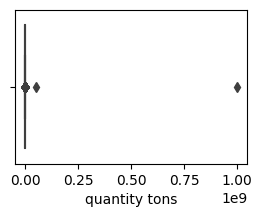

In [23]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df1['quantity tons'])

<Axes: xlabel='thickness'>

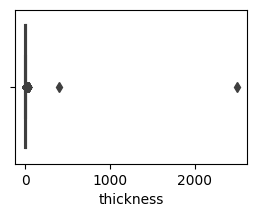

In [24]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df1['thickness'])

<Axes: xlabel='width'>

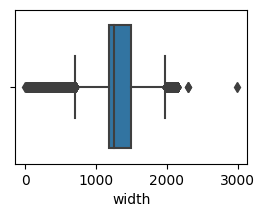

In [25]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df1['width'])

<Axes: xlabel='selling_price'>

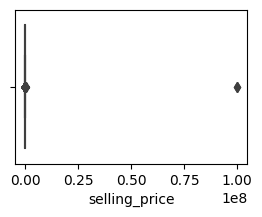

In [26]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df1['selling_price'])

<Axes: xlabel='selling_price'>

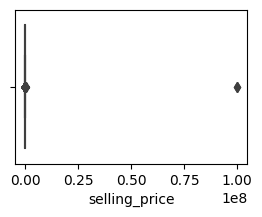

In [27]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df1['selling_price'])

In [28]:
def outlier_detect(df,col):
  q3 = df[col].quantile(0.75)
  q1 = df[col].quantile(0.25)
  iqr = q3 - q1
  ut = q3 + (1.5 * iqr)
  lt = q1 - (1.5*iqr)
  print(col,ut,lt)

In [29]:
outlier_detect(df1,'quantity tons')

quantity tons 151.446512871158 -73.3139612739467


In [30]:
outlier_detect(df1,'thickness')

thickness 6.449999999999999 -2.75


In [31]:
outlier_detect(df1,'width')

width 1980.0 700.0


In [32]:
outlier_detect(df1,'selling_price')

selling_price 1379.0 243.0


In [33]:
def outlier_removal(df,col):
  q3 = df[col].quantile(0.75)
  q1 = df[col].quantile(0.25)
  iqr = q3 - q1
  ut = q3 + (1.5 * iqr)
  lt = q1 - (1.5*iqr)
  df[col] = df[col].clip(ut,lt)

In [34]:
outlier_removal(df1,'quantity tons')

<Axes: xlabel='quantity tons'>

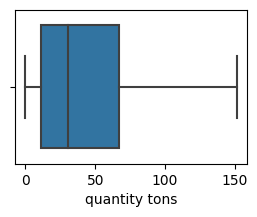

In [35]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df1['quantity tons'])

In [36]:
outlier_removal(df1,'thickness')

<Axes: xlabel='thickness'>

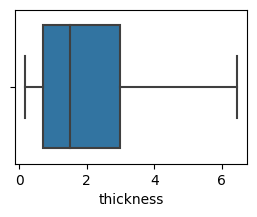

In [37]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df1['thickness'])

In [38]:
outlier_removal(df1,'width')

<Axes: xlabel='width'>

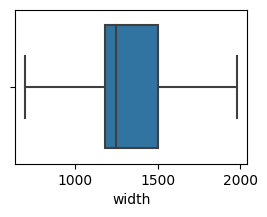

In [39]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df1['width'])

In [40]:
outlier_removal(df1,'selling_price')

<Axes: xlabel='selling_price'>

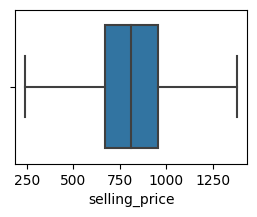

In [41]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df1['selling_price'])

In [42]:
df1.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,181664.000000,1.816640e+05,181664.000000,181664.000000,181664.000000,181664.000000,1.816640e+05,181664.000000
mean,49.177036,3.051222e+07,44.898720,25.613611,2.245467,1297.047820,4.739618e+08,819.077587
std,47.993869,2.433435e+07,24.405989,17.754055,1.890713,248.966913,7.175104e+08,209.138751
min,0.000010,1.245800e+04,25.000000,2.000000,0.180000,700.000000,6.117280e+05,243.000000
25%,10.971217,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,669.000000
50%,30.365193,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,812.000000
75%,67.161335,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,953.000000
max,151.446513,2.147484e+09,113.000000,99.000000,6.450000,1980.000000,1.722208e+09,1379.000000


#skew

In [43]:
df2 = df1.copy()

In [44]:
df2.skew()

<ipython-input-44-0d601fce7238>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.skew()


quantity tons     1.121766
customer         86.983153
country           0.753040
application       0.724587
thickness         1.060895
width             0.667625
product_ref       1.015231
selling_price     0.137041
dtype: float64

In [45]:
import warnings
warnings.filterwarnings("ignore")

<Axes: xlabel='quantity tons', ylabel='Density'>

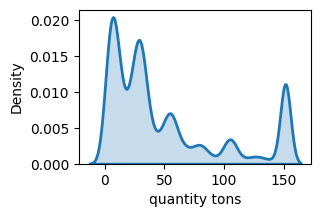

In [46]:
#quantity tons
plt.figure(figsize=(3,2))
sns.distplot(df2['quantity tons'], hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 2})
#plt.title(f'Distribution Plot for quantity tons')

In [47]:
df2['quantity tons'] = np.sqrt(df2['quantity tons'])

In [48]:
df2['quantity tons'].skew()

0.5072015461586354

<Axes: xlabel='thickness', ylabel='Density'>

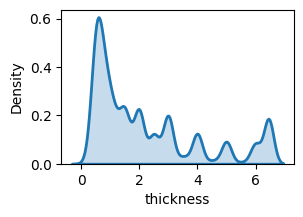

In [49]:
#thickness
plt.figure(figsize=(3,2))
sns.distplot(df2['thickness'], hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 2})
#plt.title(f'Distribution Plot for quantity tons')

In [50]:
df2['thickness'] = np.sqrt(df2['thickness'])

In [51]:
df2['thickness'].skew()

0.6088662911730471

<Axes: xlabel='thickness', ylabel='Density'>

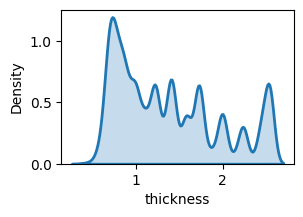

In [52]:
#thickness
plt.figure(figsize=(3,2))
sns.distplot(df2['thickness'], hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 2})
#plt.title(f'Distribution Plot for quantity tons')

<Axes: >

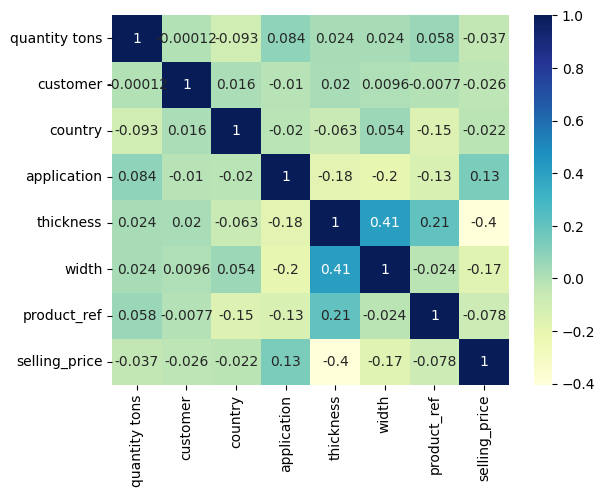

In [53]:
df_heatmap = df2.corr()
sns.heatmap(df_heatmap, annot=True,cmap="YlGnBu")

#Encoding

In [54]:
final_df = df2.copy()

In [55]:
final_df.status.unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [56]:
final_df.query("status == 'Won' or status == 'Lost'", inplace =True)

In [57]:
final_df['status'].unique()

array(['Won', 'Lost'], dtype=object)

In [58]:
final_df.to_csv("copper_final.csv")

In [59]:
final_df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,150443.000000,1.504430e+05,150443.000000,150443.000000,150443.000000,150443.000000,1.504430e+05,150443.000000
mean,6.117760,3.027511e+07,45.392215,25.194213,1.388467,1299.797203,4.748211e+08,823.948523
std,3.321977,9.455209e+06,24.488528,17.640348,0.599644,252.921604,7.172574e+08,194.768745
min,0.003162,1.245800e+04,25.000000,2.000000,0.424264,700.000000,6.117280e+05,243.000000
25%,3.271100,3.019689e+07,26.000000,10.000000,0.860233,1176.000000,6.283770e+05,671.000000
50%,5.471323,3.020531e+07,30.000000,15.000000,1.224745,1250.000000,6.406650e+05,811.000000
75%,8.054216,3.027982e+07,78.000000,41.000000,1.732051,1500.000000,1.332077e+09,951.000000
max,12.306361,2.147484e+09,113.000000,99.000000,2.539685,1980.000000,1.722208e+09,1379.000000


Encoding the data using LabelEncoder

In [60]:
#find unique values
final_df['country'] = final_df['country'].astype(str)
country = final_df['country'].unique()
status = final_df['status'].unique()
item = final_df['item type'].unique()
print(country)
print(status)
print(item)

['28' '25' '30' '32' '38' '78' '27' '77' '113' '79' '26' '39' '40' '84'
 '80' '89' '107']
['Won' 'Lost']
['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']


In [61]:
final_df['status'] = final_df['status'].map({'Won':1,'Lost':0})

In [62]:
final_df['item type'] = final_df['item type'].map({'W':0,'WI':1,'S':2,'Others':3,'PL':4,'IPL':5,'SLAWR':6})

In [63]:
print(final_df['status'].unique())
print(final_df['item type'].unique())

[1 0]
[0 1 2 3 4 5 6]


In [64]:
final_df

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,7.358746,30156308.0,28,1,0,10.0,1.414214,1500.0,1670798778,854.00
1,12.306361,30202938.0,25,1,0,41.0,0.894427,1210.0,1668701718,1047.00
2,12.306361,30153963.0,30,1,1,28.0,0.616441,952.0,628377,644.33
3,12.306361,30349574.0,32,1,2,59.0,1.516575,1317.0,1668701718,768.00
4,12.306361,30211560.0,28,1,0,10.0,2.000000,1980.0,640665,577.00
...,...,...,...,...,...,...,...,...,...,...
181667,10.333600,30200854.0,25,1,0,41.0,0.979796,1240.0,164141591,602.00
181668,10.123360,30200854.0,25,1,0,41.0,0.979796,1220.0,164141591,591.00
181669,12.306361,30200854.0,25,1,0,41.0,0.974679,1500.0,164141591,589.00
181670,2.058056,30200854.0,25,1,0,41.0,0.842615,1250.0,164141591,619.00


#Model


##Predict selling price

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV

In [66]:
X = final_df.drop(["selling_price"],axis = 1)
y = final_df['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [67]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
#decision tree
# Instantiate dt
dt = DecisionTreeRegressor(max_depth = 20)
# Fit dt to the training set
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
rsquared_dt = r2_score(y_test,y_pred_dt)
mse_dt = mean_squared_error(y_test,y_pred_dt)
print("Test set mean squared error of dt:", mse_dt)
print("Test set R2 of rf: {:.2f}".format(rsquared_dt))

Test set mean squared error of dt: 17171.730171592397
Test set R2 of rf: 0.55


In [69]:
#compute max_depth
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeRegressor(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train, y_train) # the model is trained
  trainAccuracy = r2_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeRegressor(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10, scoring = make_scorer(r2_score)) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth : ",depth, " Train R2 : ",trainAccuracy, " Val Score : ", np.mean(valAccuracy))

Depth :  1  Train R2 :  0.31170034609741226  Val Score :  0.31156286873715777
Depth :  2  Train R2 :  0.3526432351891641  Val Score :  0.35248062905780814
Depth :  3  Train R2 :  0.38662617085727624  Val Score :  0.38638372106030766
Depth :  4  Train R2 :  0.40658436658242814  Val Score :  0.4059029117964054
Depth :  5  Train R2 :  0.4237795386550215  Val Score :  0.4226344702690648
Depth :  6  Train R2 :  0.44082748415912887  Val Score :  0.43751994790369475
Depth :  7  Train R2 :  0.4616739705681264  Val Score :  0.45598325367510606
Depth :  8  Train R2 :  0.48524055258108645  Val Score :  0.4761270003442541
Depth :  9  Train R2 :  0.5131979986392128  Val Score :  0.49899881602828255
Depth :  10  Train R2 :  0.5377067951819808  Val Score :  0.5180208513493562
Depth :  20  Train R2 :  0.838963535579583  Val Score :  0.5174928581393984
Depth :  40  Train R2 :  0.9794902003405224  Val Score :  0.40116934415560135
Depth :  60  Train R2 :  0.9804429853834431  Val Score :  0.40001075363762

In [70]:
#Random forest
rf = RandomForestRegressor(n_estimators= 100, max_depth = 20, max_features='auto')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rsquared_rf= r2_score(y_test,y_pred_rf)
mse_rf = mean_squared_error(y_test,y_pred_rf)
print("Test set mean squared error of rf",mse_rf)
print("Test set R2 of rf: {:.2f}".format(rsquared_rf))

Test set mean squared error of rf 12697.801471688676
Test set R2 of rf: 0.66


In [73]:
et = ExtraTreesRegressor()
et.fit(X_train, y_train)
y_pred_et = et.predict(X_test)
rsquared_et= r2_score(y_test,y_pred_et)
mse_et = mean_squared_error(y_test,y_pred_et)
print("Test set mean squared error of et:",mse_et)
print("Test set R2 of et: {:.2f}".format(rsquared_et))

Test set mean squared error of et: 16128.707297168996
Test set R2 of et: 0.57


In [74]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = rf.predict(X_test)
rsquared_xgb= r2_score(y_test,y_pred_xgb)
mse_xgb = mean_squared_error(y_test,y_pred_xgb)
print("Test set mean squared error of xgb:",mse_xgb )
print("Test set R2 of xgb: {:.2f}".format(rsquared_xgb))

Test set mean squared error of xgb: 12697.801471688676
Test set R2 of xgb: 0.66


In [75]:
models = pd.DataFrame({
    'Model': ["DecisionTreeRegressor", 'RandomForest Regression','ExtraTreesRegressor','XGBRegression' ],
    'R2_Score': [rsquared_dt, rsquared_rf, rsquared_et,rsquared_xgb],
    'MSE':[mse_dt,mse_rf,mse_et,mse_xgb]

})
models.style.background_gradient(cmap='Blues')

,Model,R2_Score,MSE
0,DecisionTreeRegressor,0.546736,17171.730172
1,RandomForest Regression,0.664830,12697.801472
2,ExtraTreesRegressor,0.574268,16128.707297
3,XGBRegression,0.664830,12697.801472


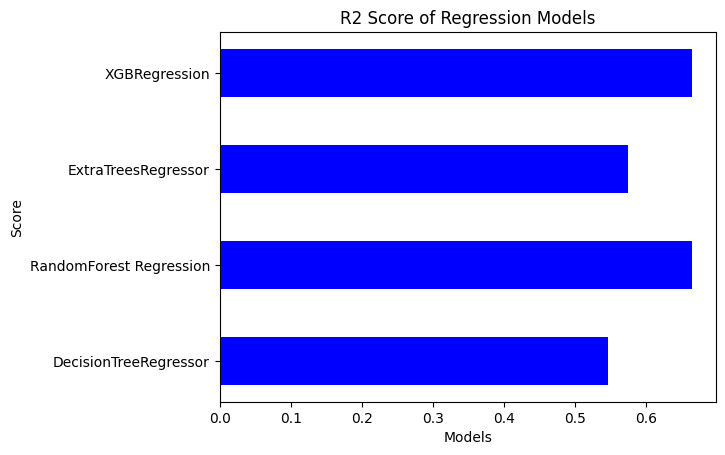

In [76]:
models = ["DecisionTreeRegressor", 'RandomForest Regression','ExtraTreesRegressor','XGBRegression' ]
score = [rsquared_dt, rsquared_rf, rsquared_et,rsquared_xgb]
plt.barh(models, score, color='blue',height=0.5)
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('R2 Score of Regression Models')
plt.show()

In [91]:
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [92]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
best_model

RandomForestRegressor(max_depth=20, max_features='auto')

In [121]:
final_df.head(1)

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,7.358746,30156308.0,28,1,0,10.0,1.414214,1500.0,1670798778,854.0


In [83]:
predicted_value = rf.predict(np.array([[623718,12678,25,1,2,2,128,300,611112]]))
predicted_value

array([677.92083802])

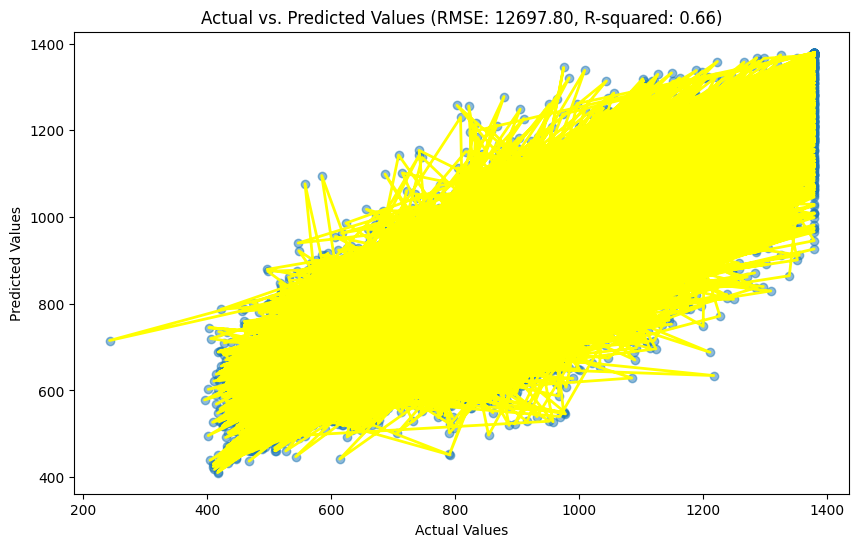

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot(y_test, y_pred_rf, color='yellow', linewidth=2)
plt.title(f'Actual vs. Predicted Values (RMSE: {mse_rf:.2f}, R-squared: {rsquared_rf:.2f})')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

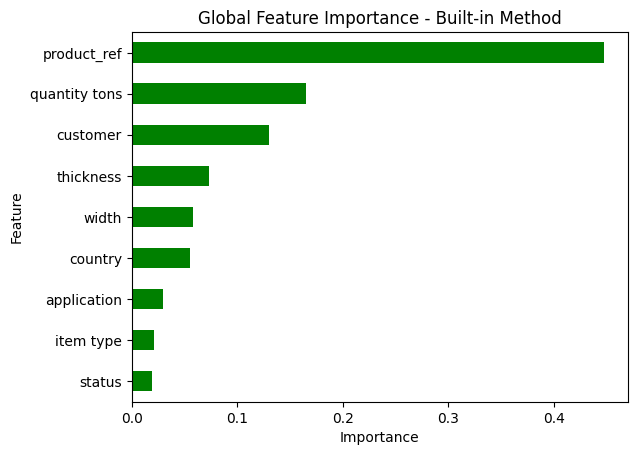

In [86]:
global_importances = pd.Series(rf.feature_importances_, index= ['quantity tons','customer','country','status','item type','application','thickness','width','product_ref'])
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

##Predict Status

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_auc_score
from sklearn.svm import SVC
from sklearn import metrics

filter the status for won and lost

In [87]:
final_df_cl = final_df.copy()

In [88]:
final_df_cl['status'].unique()

array([1, 0])

In [89]:
final_df_cl.query("status == 1 or status == 0", inplace =True)

In [90]:
final_df_cl['status'].unique()

array([1, 0])

In [91]:
#seperate the dependent variable(target) and independent columns(features)
X = final_df_cl[['quantity tons','thickness','width','customer','selling_price','item type','country','application','product_ref']].values
y = final_df_cl['status']

In [92]:
#split the data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [93]:
scaler_classify = StandardScaler()
scaler_classify .fit(X_train)
X_train = scaler_classify.transform(X_train)
X_test = scaler_classify.transform(X_test)

In [94]:
dt_cl = DecisionTreeClassifier(max_depth = 20)
# Fit dt to the training set
dt_cl.fit(X_train, y_train) # it will ask all possible questions, compute the information gain and choose the best split

# Predict test set labels
y_pred_dt_cl= dt_cl.predict(X_test)
# Compute test set accuracy
acc_dt = accuracy_score(y_test, y_pred_dt_cl)
f1_dt = f1_score(y_test, y_pred_dt_cl)
print("Test set accuracy: {:.2f}".format(acc_dt))
print("Test set f1-score: {:.2f}".format(acc_dt))
aur_dt = roc_auc_score(y_train, dt_cl.predict(X_train))
print("Train set AUC : ", aur_dt)
metrics.confusion_matrix(y_test,y_pred_dt_cl)


Test set accuracy: 0.92
Test set f1-score: 0.92
Train set AUC :  0.9684886455574336


array([[ 5743,  1217],
       [ 1254, 21875]])

In [95]:
#reduce overfitting
##there are 1 param to play with - max depth - to choose the best parameter, I will try different combinations and hoose the one which has the best accuracy/auc/any eval metric on cross-validation or test data-set
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dtcl = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dtcl.fit(X_train, y_train) # the model is trained
  trainAccuracy = accuracy_score(y_train, dtcl.predict(X_train)) # this is useless information - i am showing to prove a point
  dtcl = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dtcl, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))


Depth  :  1  Training Accuracy :  0.771690180633797  Cross val score :  0.7716901808078049
Depth  :  2  Training Accuracy :  0.771690180633797  Cross val score :  0.7716901808078049
Depth  :  3  Training Accuracy :  0.771690180633797  Cross val score :  0.7716901808078049
Depth  :  4  Training Accuracy :  0.7969074563371388  Cross val score :  0.796649906256856
Depth  :  5  Training Accuracy :  0.814646791963707  Cross val score :  0.8153281500188536
Depth  :  6  Training Accuracy :  0.8223407614204763  Cross val score :  0.8208036981701344
Depth  :  7  Training Accuracy :  0.836864582814032  Cross val score :  0.8356265879000583
Depth  :  8  Training Accuracy :  0.8482642870199578  Cross val score :  0.8462785104042533
Depth  :  9  Training Accuracy :  0.8589494325074364  Cross val score :  0.8545873223702387
Depth  :  10  Training Accuracy :  0.8719028864848697  Cross val score :  0.8634860886113298
Depth  :  20  Training Accuracy :  0.9772089004104558  Cross val score :  0.911295001

In [96]:
rf_cl = RandomForestClassifier(n_estimators=10)
# Fit dt to the training set
rf_cl.fit(X_train, y_train) # it will ask all possible questions, compute the information gain and choose the best split

# Predict test set labels
y_pred_rf_cl= rf_cl.predict(X_test)
# Compute test set accuracy
acc_rf = accuracy_score(y_test, y_pred_rf_cl)
f1_rf = f1_score(y_test, y_pred_rf_cl)
print("Test set accuracy: {:.2f}".format(acc_rf))
print("Test set f1-score: {:.2f}".format(f1_rf))
aur_rf = roc_auc_score(y_train, rf_cl.predict(X_train))
print("Train set AUC : ", aur_rf)
metrics.confusion_matrix(y_test,y_pred_rf_cl)

Test set accuracy: 0.93
Test set f1-score: 0.95
Train set AUC :  0.9959194955618385


array([[ 5937,  1023],
       [ 1122, 22007]])

In [97]:
xgb_cl = xgb.XGBClassifier()
# Fit dt to the training set
xgb_cl.fit(X_train, y_train) # it will ask all possible questions, compute the information gain and choose the best split

# Predict test set labels
y_pred_xgb_cl= xgb_cl.predict(X_test)
# Compute test set accuracy
acc_xgb = accuracy_score(y_test, y_pred_xgb_cl)
f1_xgb = f1_score(y_test, y_pred_xgb_cl)
print("Test set accuracy: {:.2f}".format(acc_xgb))
print("Test set f1-score: {:.2f}".format(f1_xgb))
aur_xgb = roc_auc_score(y_train, xgb_cl.predict(X_train))
print("Train set AUC : ", aur_xgb)
metrics.confusion_matrix(y_test,y_pred_xgb_cl)

Test set accuracy: 0.90
Test set f1-score: 0.94
Train set AUC :  0.8529715283489119


array([[ 4933,  2027],
       [  987, 22142]])

In [98]:
models = pd.DataFrame({
    'Model': ['RandomForestClassifier', 'XGBClassifier', 'DecisionTreeClassifier' ],
    'Accuracy': [acc_rf, acc_xgb, acc_dt],
    'F2-score':[f1_rf,f1_xgb,f1_dt],
    'AUROC score':[aur_rf,aur_xgb,aur_dt]

})
models.style.background_gradient(cmap='Blues')

,Model,Accuracy,F2-score,AUROC score
0,RandomForestClassifier,0.928711,0.953530,0.995919
1,XGBClassifier,0.899831,0.936276,0.852972
2,DecisionTreeClassifier,0.917877,0.946539,0.968489


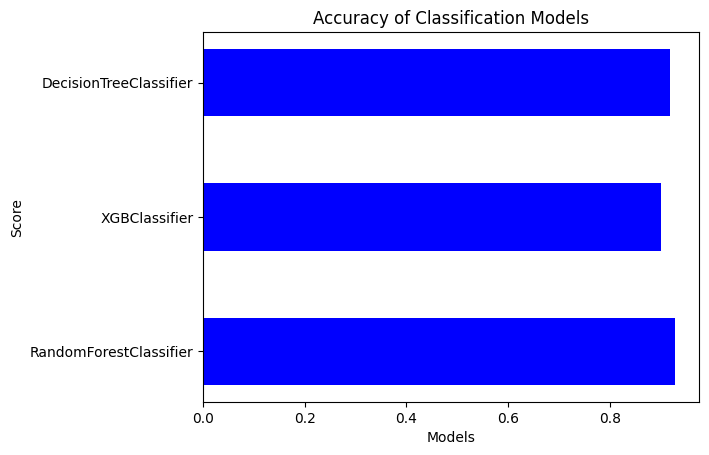

In [99]:
models = ['RandomForestClassifier', 'XGBClassifier', 'DecisionTreeClassifier']
score = [acc_rf, acc_xgb, acc_dt]

plt.barh(models, score, color='blue',height=0.5)
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Accuracy of Classification Models')
plt.show()


In [ ]:
'quantity tons','thickness','width','customer','selling_price','item type','country','application','product_ref'

In [105]:
#predicting status
predicted_stat = rf_cl.predict(np.array([[612728,128,300,12678,955,1,25,2,611112]]))
if predicted_stat == 1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Lost
